In [ ]:
!pip install plotly

In [1]:
import pickle

with open('C:/Users/LG/bigcontest/dataset/GS_DATA.bin', 'rb') as f:
    gs_data = pickle.load(f) 
with open('C:/Users/LG/bigcontest/dataset/SH_DATA.bin', 'rb') as f:
    sh_data = pickle.load(f)  
with open('C:/Users/LG/bigcontest/dataset/SK_DATA.bin', 'rb') as f:
    sk_data = pickle.load(f)  

In [2]:
# 한글 깨짐 현상을 해결
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [44]:
df = px.data.gapminder()

In [4]:
gs_data.keys()

dict_keys(['GS_TOTAL', 'GS_CATEGORY', 'GS_DONG', 'ITEM_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])

In [5]:
gs = gs_data['GS_TOTAL']

In [7]:
sh_data.keys()

dict_keys(['SH_RESIDENT', 'SH_FOREIGN', 'INDUSTRY_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])

In [4]:
sh = sh_data['SH_RESIDENT']

## 신한데이터

#### 구 별로 산업별 AMT,CMT 년도 기준 변화 비교

In [136]:
# 구, 년도 별로 나누기
sh_seoul_gunggu_19 = sh.query("(SI_CODE == '11') and (GU_CODE=='14') and (YEAR == 2019)")
sh_seoul_gunggu_20 = sh.query("(SI_CODE == '11') and (GU_CODE=='14') and (YEAR == 2020)")
sh_seoul_nowongu_19 = sh.query("(SI_CODE == '11') and (GU_CODE=='35') and (YEAR == 2019)")
sh_seoul_nowongu_20 = sh.query("(SI_CODE == '11') and (GU_CODE=='35') and (YEAR == 2020)")
sh_daegu_gunggu_19 = sh.query("(SI_CODE == '27') and (GU_CODE=='11') and (YEAR == 2019)")
sh_daegu_gunggu_20 = sh.query("(SI_CODE == '27') and (GU_CODE=='11') and (YEAR == 2020)")
sh_daegu_suseonggu_19 = sh.query("(SI_CODE == '27') and (GU_CODE=='26') and (YEAR == 2019)")
sh_daegu_suseonggu_20 = sh.query("(SI_CODE == '27') and (GU_CODE=='26') and (YEAR == 2020)")

In [103]:
sh_daegu_gunggu_20

,DATE,YEAR,MONTH,DAY,GU_CODE,DONG_CODE,INDUSTRY_CODE,SEX,AGE,USE_CNT,USE_AMT,SI_CODE,TOTAL_CODE
1310606,2020-02-01,2020,2,1,11,517,10,F,25,5,79,27,2711517
1310607,2020-02-01,2020,2,1,11,517,10,M,20,16,1054,27,2711517
1310608,2020-02-01,2020,2,1,11,517,10,M,25,11,269,27,2711517
1310609,2020-02-01,2020,2,1,11,517,10,M,30,11,448,27,2711517
1310610,2020-02-01,2020,2,1,11,517,10,M,45,5,343,27,2711517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529532,2020-05-31,2020,5,31,11,690,80,M,40,55,1291,27,2711690
2529533,2020-05-31,2020,5,31,11,690,80,M,45,38,1360,27,2711690
2529534,2020-05-31,2020,5,31,11,690,80,M,50,33,411,27,2711690
2529535,2020-05-31,2020,5,31,11,690,80,M,55,11,126,27,2711690


In [134]:
# 업종별 CNT, AMT sum하기
sh_seoul_gunggu_19 = pd.DataFrame(sh_seoul_gunggu_19.groupby(['INDUSTRY_CODE'])['USE_CNT','USE_AMT'].sum())
sh_seoul_gunggu_20 = pd.DataFrame(sh_seoul_gunggu_20.groupby(['INDUSTRY_CODE'])['USE_CNT','USE_AMT'].sum())
sh_seoul_nowongu_19 = pd.DataFrame(sh_seoul_nowongu_19.groupby(['INDUSTRY_CODE'])['USE_CNT','USE_AMT'].sum())
sh_seoul_nowongu_20 = pd.DataFrame(sh_seoul_nowongu_20.groupby(['INDUSTRY_CODE'])['USE_CNT','USE_AMT'].sum())
sh_daegu_gunggu_19 = pd.DataFrame(sh_daegu_gunggu_19.groupby(['INDUSTRY_CODE'])['USE_CNT','USE_AMT'].sum())
sh_daegu_gunggu_20 = pd.DataFrame(sh_daegu_gunggu_20.groupby(['INDUSTRY_CODE'])['USE_CNT','USE_AMT'].sum())
sh_daegu_suseonggu_19 = pd.DataFrame(sh_daegu_suseonggu_19.groupby(['INDUSTRY_CODE'])['USE_CNT','USE_AMT'].sum())
sh_daegu_suseonggu_20 = pd.DataFrame(sh_daegu_suseonggu_20.groupby(['INDUSTRY_CODE'])['USE_CNT','USE_AMT'].sum())

C:\Users\LG\.conda\envs\multi_campus\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\LG\.conda\envs\multi_campus\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\LG\.conda\envs\multi_campus\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
C:\Users\LG\.conda\envs\multi_campus\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
C:\Users\LG\.conda\envs\multi_campus\lib\site-pac

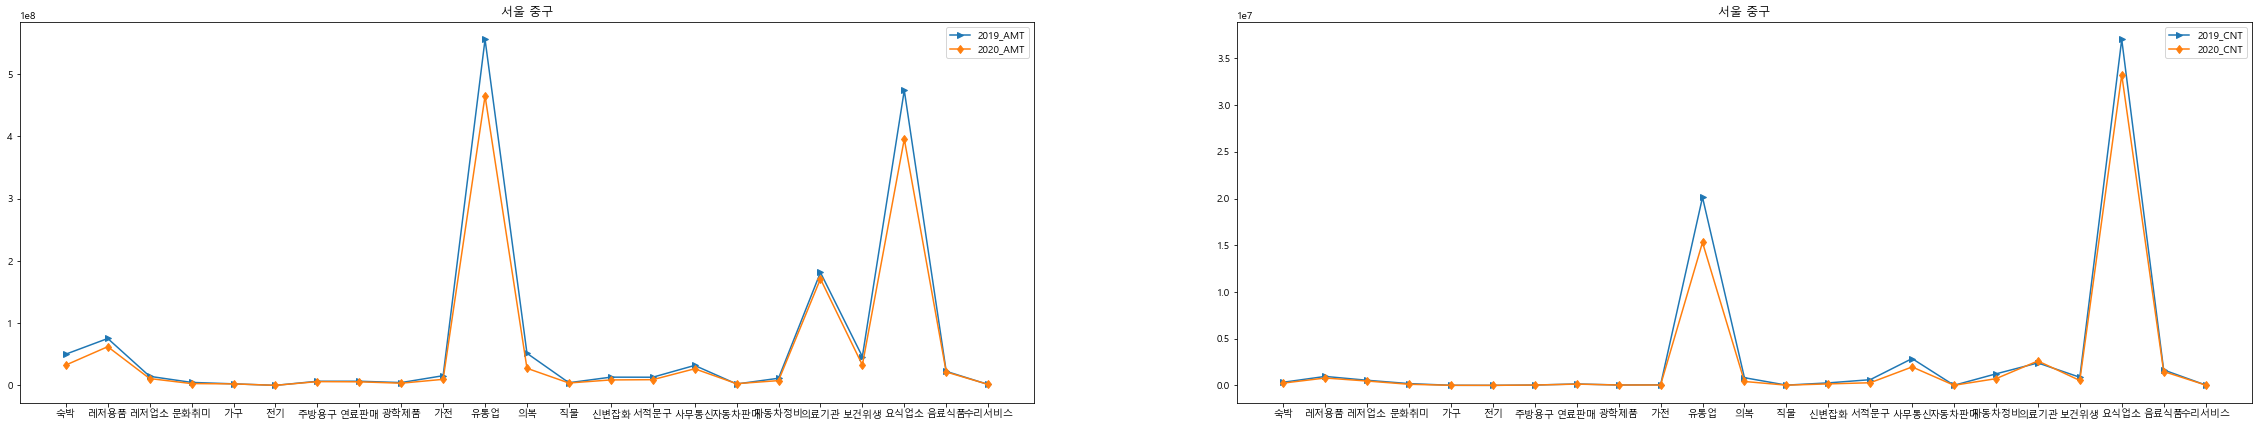

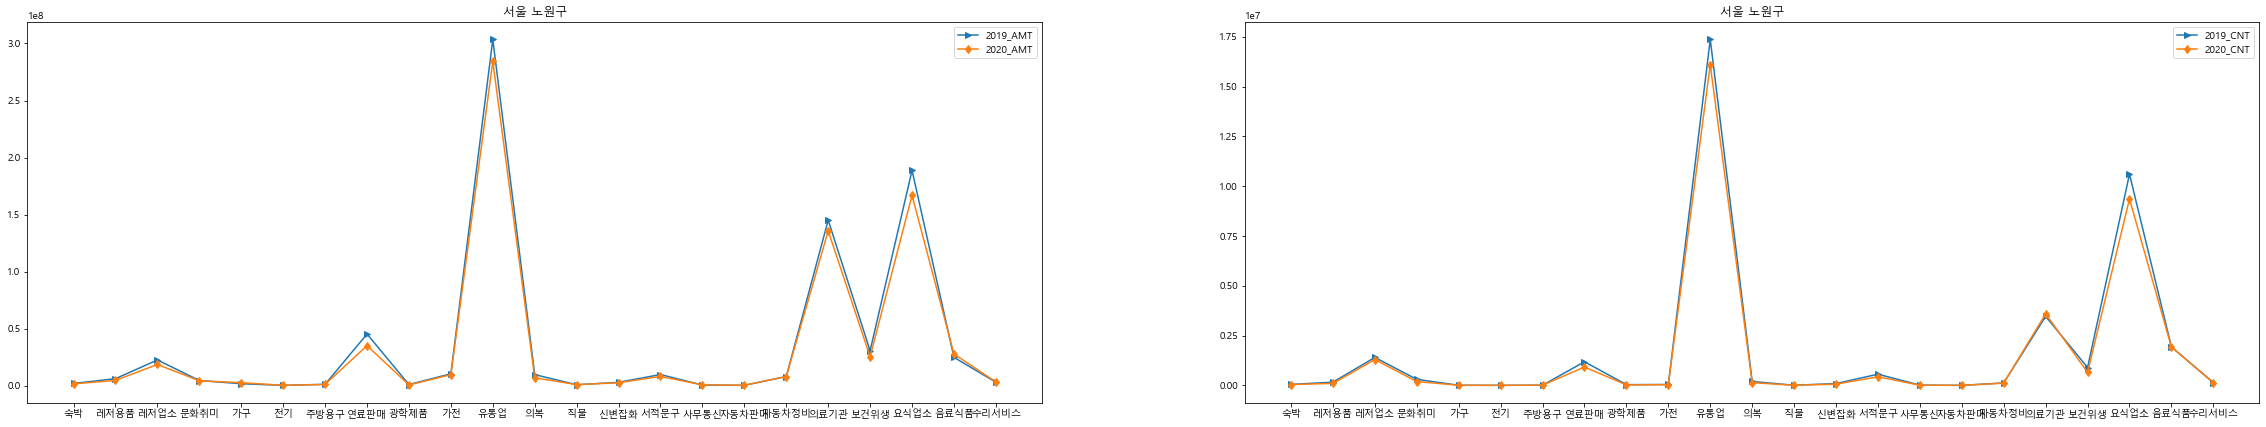

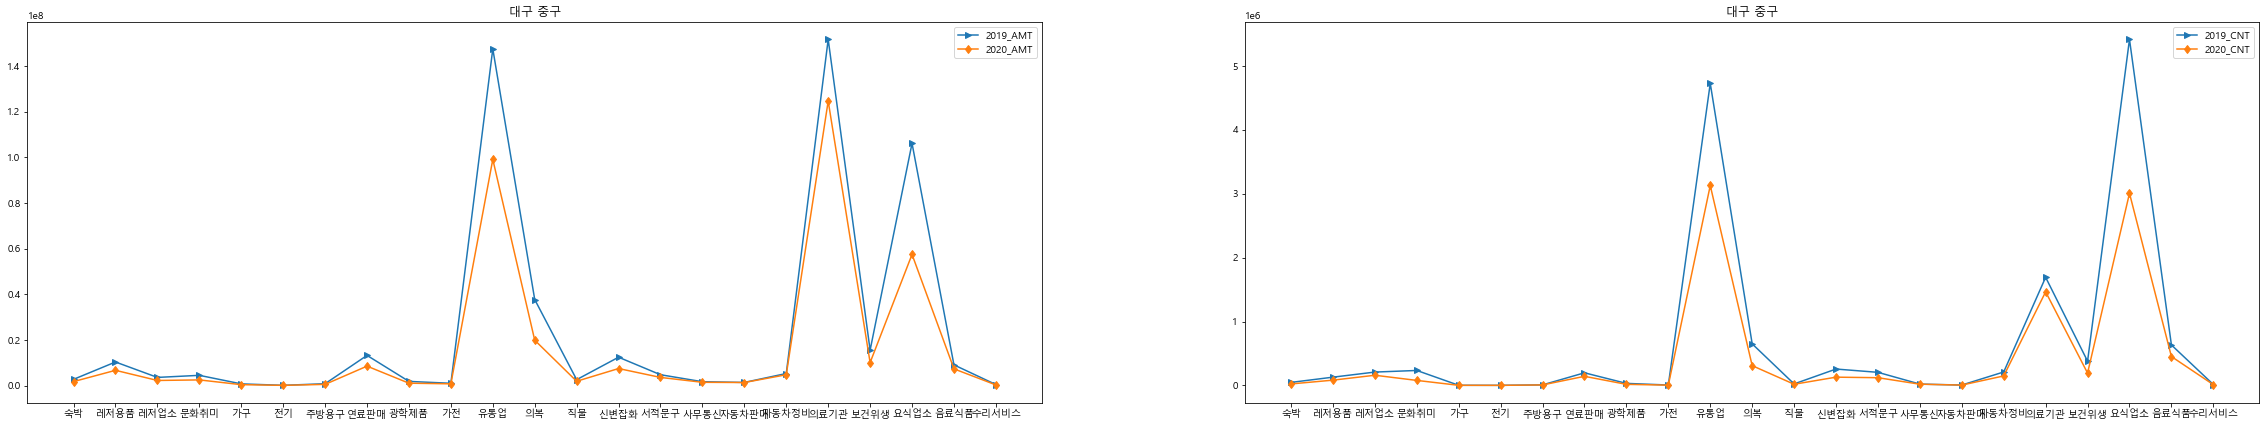

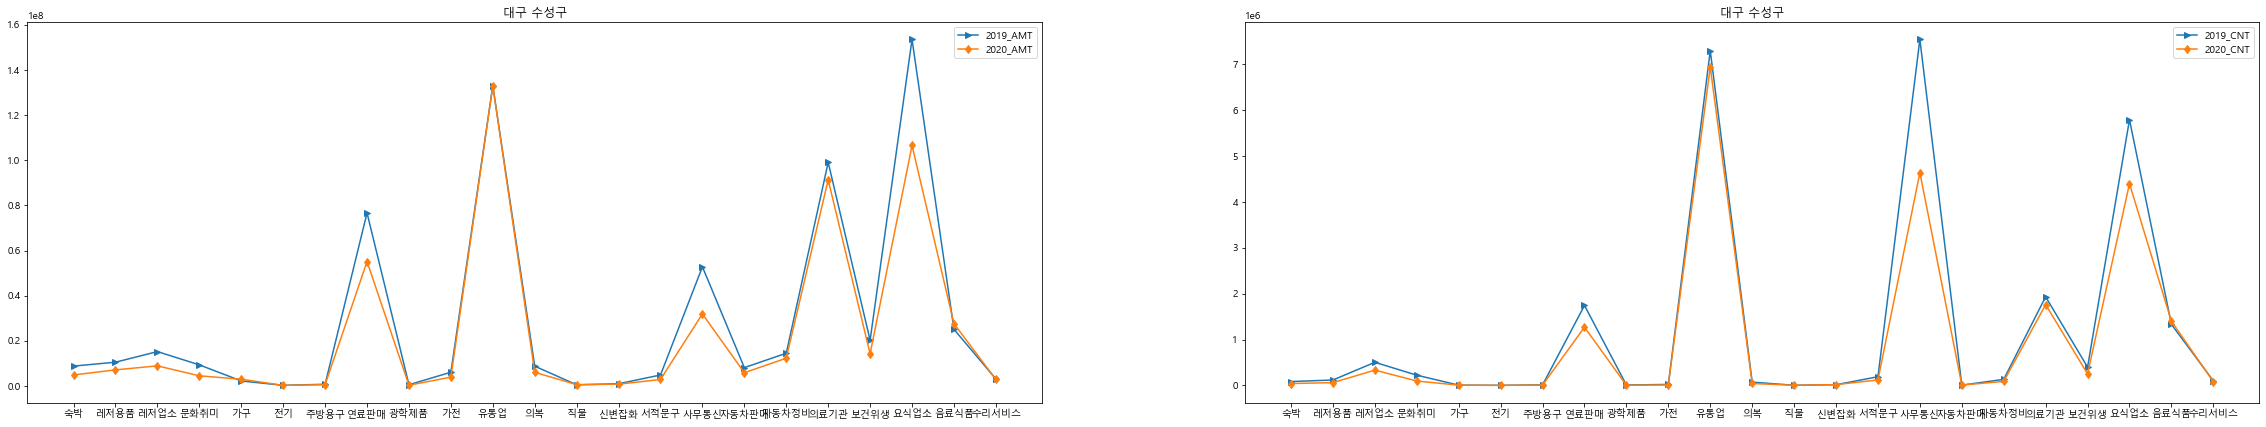

In [108]:
# 구 별로 산업별 AMT,CMT 년도 기준 변화 비교
data = [(sh_seoul_gunggu_19,sh_seoul_gunggu_20),(sh_seoul_nowongu_19,sh_seoul_nowongu_20),(sh_daegu_gunggu_19,sh_daegu_gunggu_20),(sh_daegu_suseonggu_19,sh_daegu_suseonggu_20)]
gu_name = ['서울 중구','서울 노원구','대구 중구','대구 수성구']

label = sh_data['INDUSTRY_CODE_DICT'].values()
index = np.arange(len(label))

for gu, d in zip(gu_name,data):
    plt.figure(figsize = (40,7))

    plt.subplot(1,2,1)
    plt.plot(index, d[0]['USE_AMT'],'>-',label= '2019_AMT')
    plt.plot(index, d[1]['USE_AMT'],'d-',label= '2020_AMT')
    plt.xticks(index, label)
    plt.legend()
    plt.title(gu)

    plt.subplot(1,2,2)
    plt.plot(index, d[0]['USE_CNT'],'>-',label= '2019_CNT')
    plt.plot(index, d[1]['USE_CNT'],'d-',label= '2020_CNT')

    plt.xticks(index, label)
    plt.legend()
    plt.title(gu)

    plt.show()

In [137]:
# 업종별 CNT, AMT sum하기
sh_seoul_gunggu_19 = pd.DataFrame(sh_seoul_gunggu_19.groupby(['MONTH','INDUSTRY_CODE'])['USE_CNT','USE_AMT'].sum())
sh_seoul_gunggu_20 = pd.DataFrame(sh_seoul_gunggu_20.groupby(['MONTH','INDUSTRY_CODE'])['USE_CNT','USE_AMT'].sum())
sh_seoul_nowongu_19 = pd.DataFrame(sh_seoul_nowongu_19.groupby(['MONTH','INDUSTRY_CODE'])['USE_CNT','USE_AMT'].sum())
sh_seoul_nowongu_20 = pd.DataFrame(sh_seoul_nowongu_20.groupby(['MONTH','INDUSTRY_CODE'])['USE_CNT','USE_AMT'].sum())
sh_daegu_gunggu_19 = pd.DataFrame(sh_daegu_gunggu_19.groupby(['MONTH','INDUSTRY_CODE'])['USE_CNT','USE_AMT'].sum())
sh_daegu_gunggu_20 = pd.DataFrame(sh_daegu_gunggu_20.groupby(['MONTH','INDUSTRY_CODE'])['USE_CNT','USE_AMT'].sum())
sh_daegu_suseonggu_19 = pd.DataFrame(sh_daegu_suseonggu_19.groupby(['MONTH','INDUSTRY_CODE'])['USE_CNT','USE_AMT'].sum())
sh_daegu_suseonggu_20 = pd.DataFrame(sh_daegu_suseonggu_20.groupby(['MONTH','INDUSTRY_CODE'])['USE_CNT','USE_AMT'].sum())

C:\Users\LG\.conda\envs\multi_campus\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\LG\.conda\envs\multi_campus\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\LG\.conda\envs\multi_campus\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
C:\Users\LG\.conda\envs\multi_campus\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
C:\Users\LG\.conda\envs\multi_campus\lib\site-pac

In [123]:
# 정규화..?
normalization_df_19 = (sh_seoul_gunggu_19 - sh_seoul_gunggu_19.mean())/sh_seoul_gunggu_19.std()
normalization_df_20 = (sh_seoul_gunggu_20 - sh_seoul_gunggu_20.mean())/sh_seoul_gunggu_20.std()

#### 구별 산업별 월별 기준 AMT변화 비교

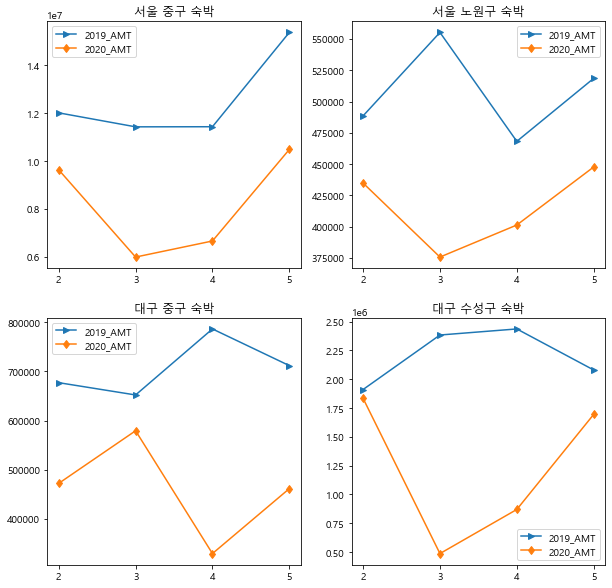

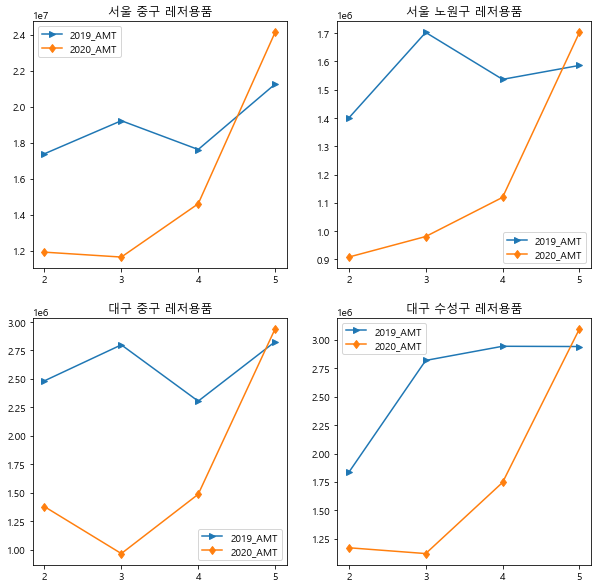

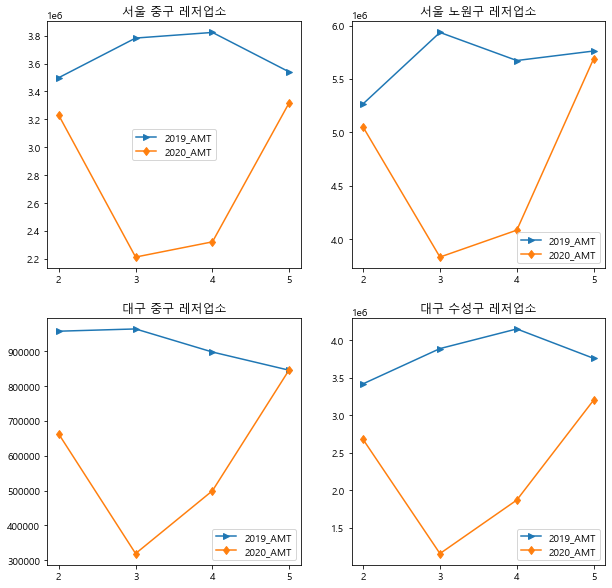

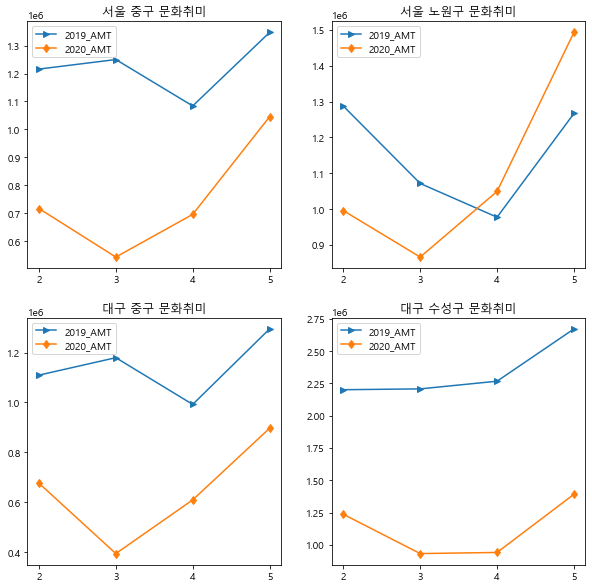

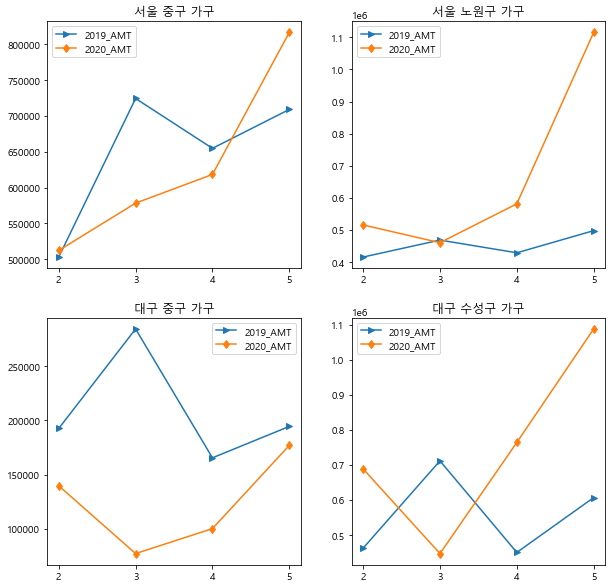

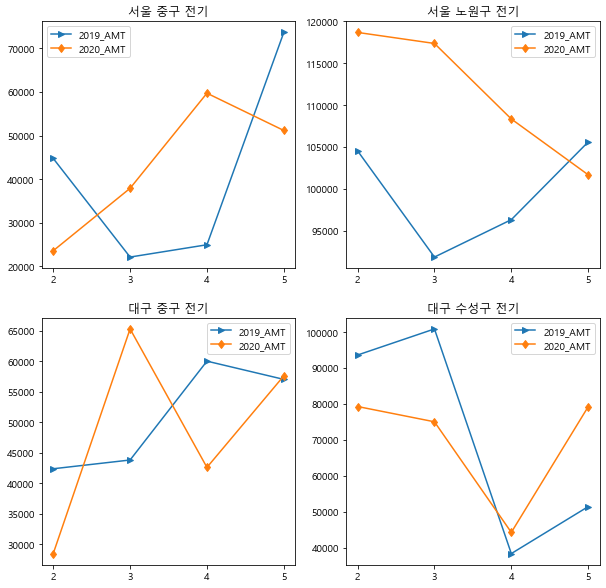

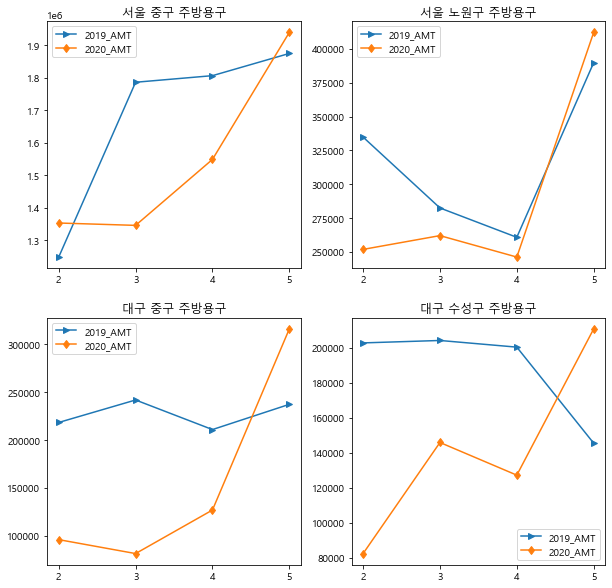

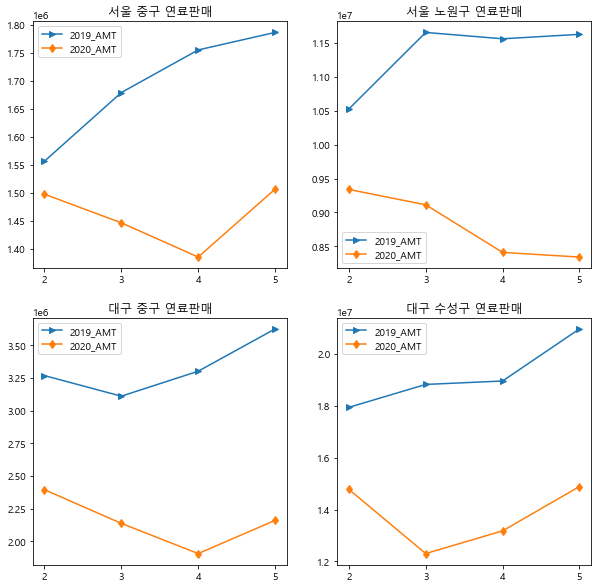

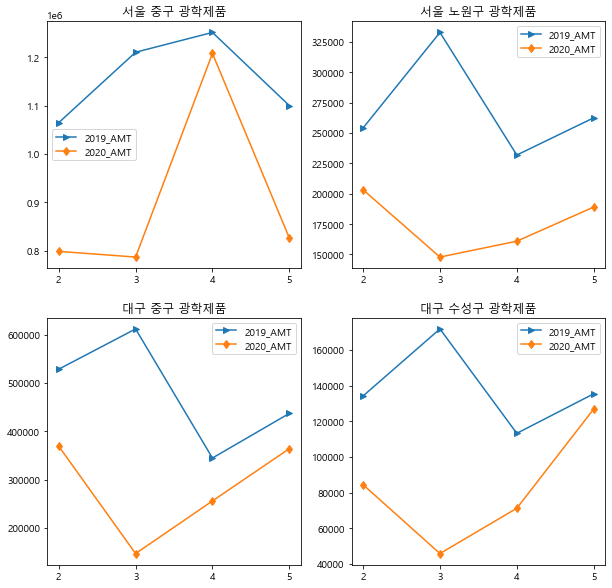

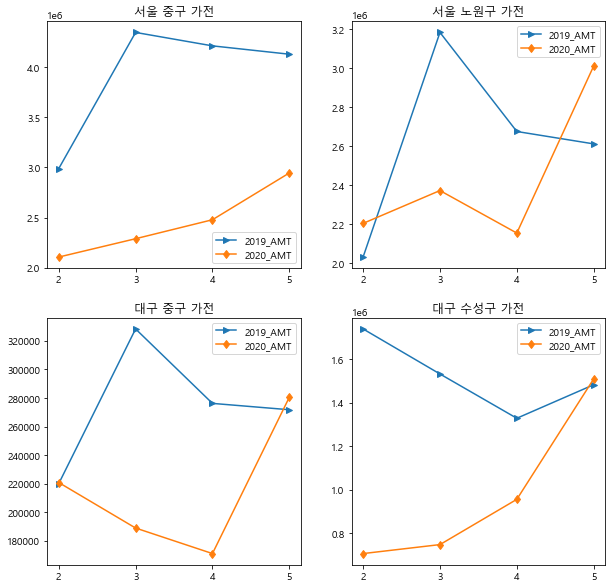

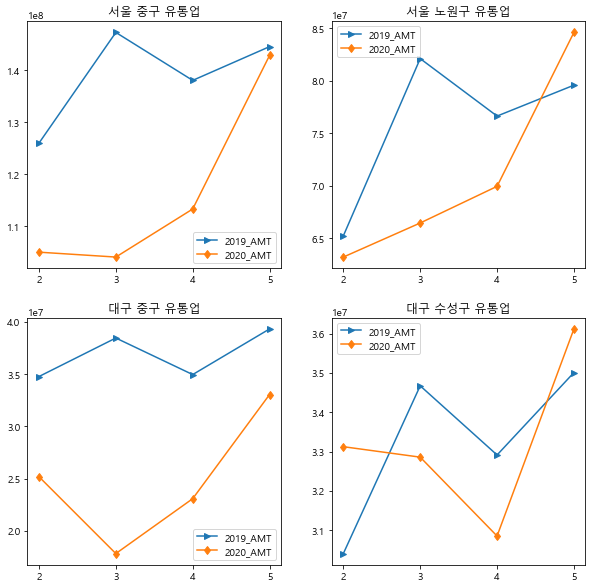

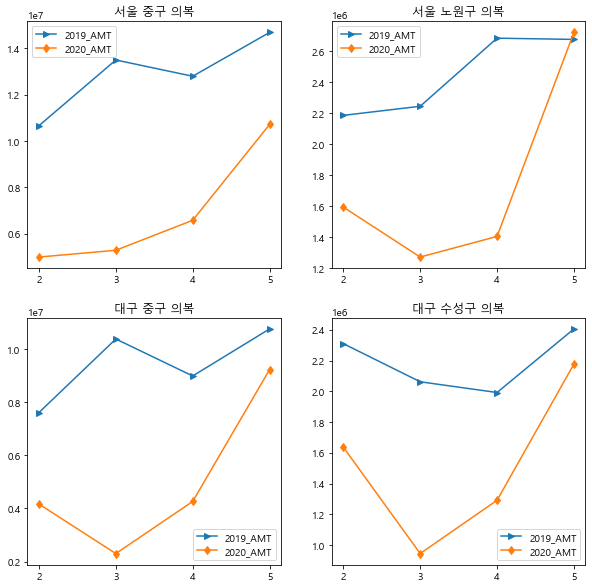

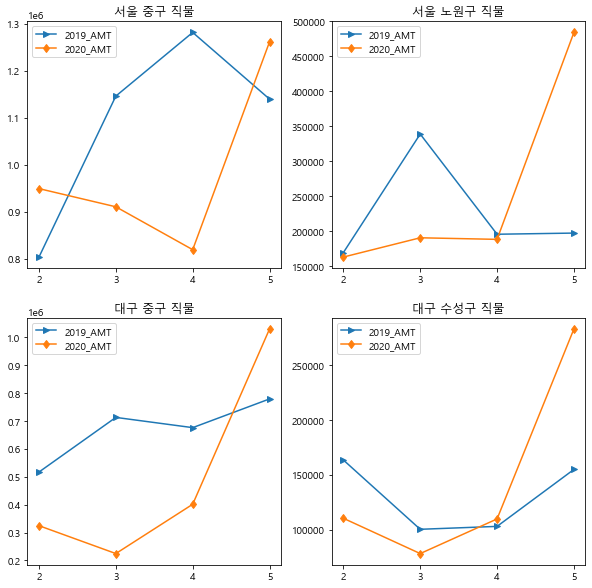

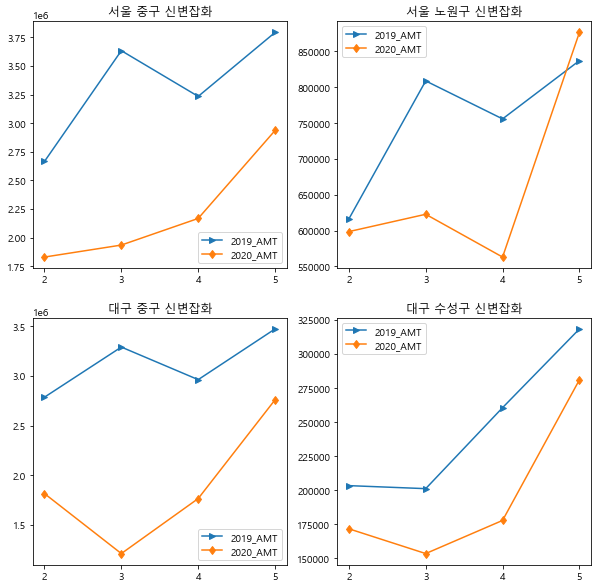

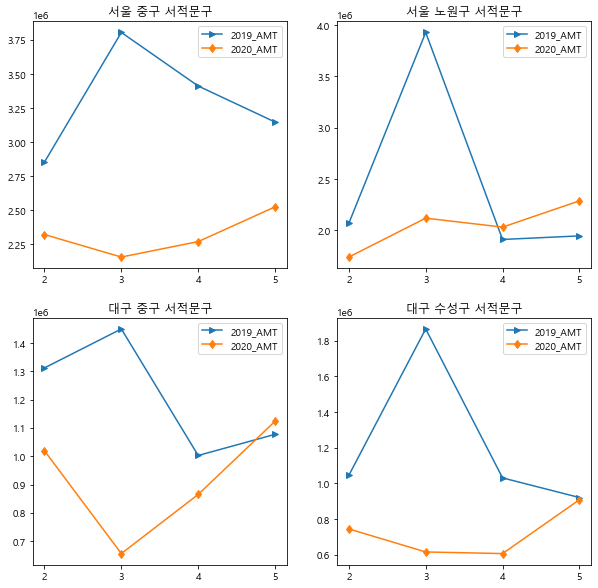

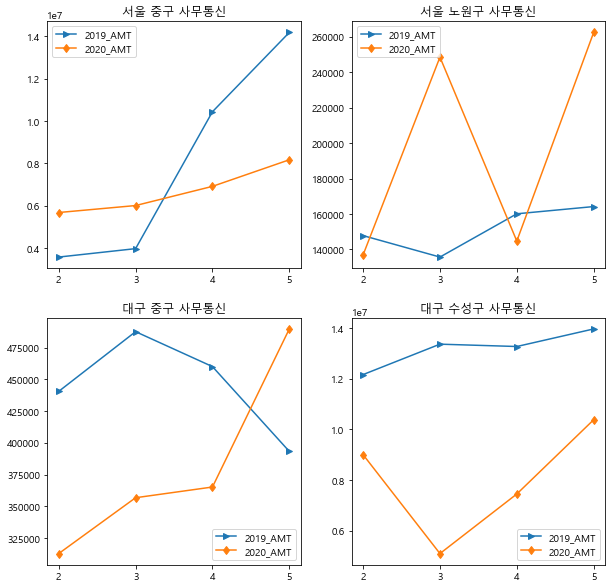

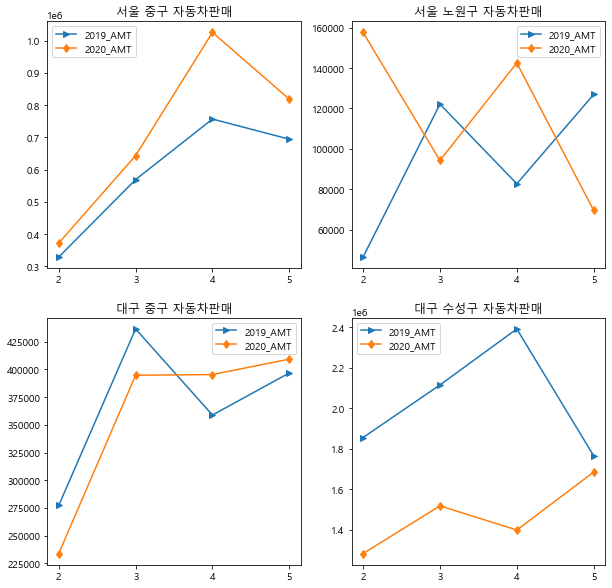

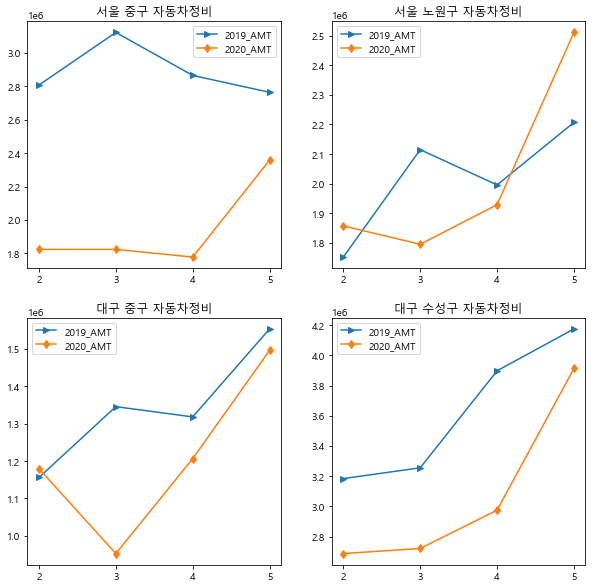

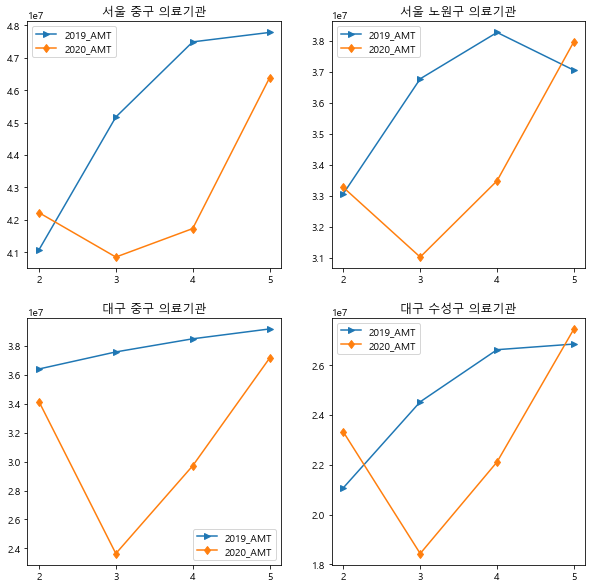

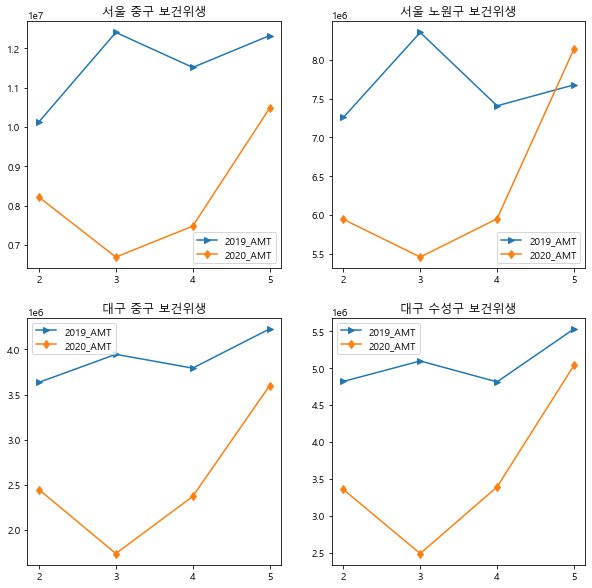

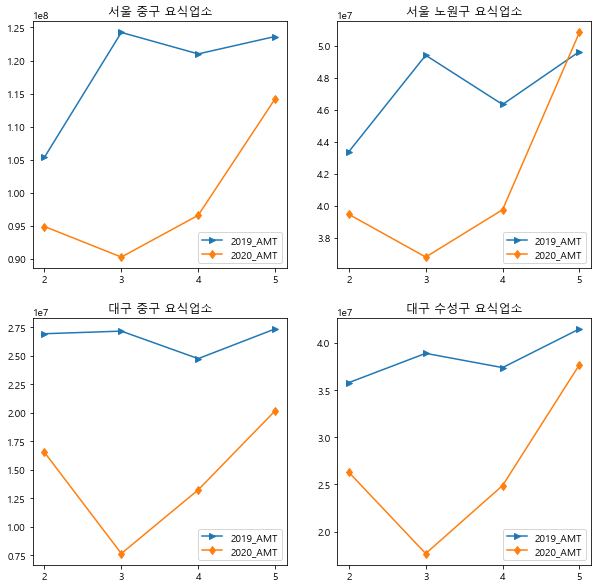

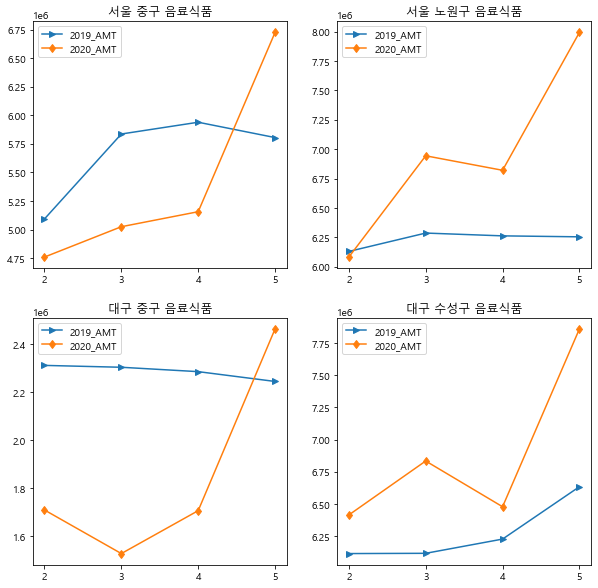

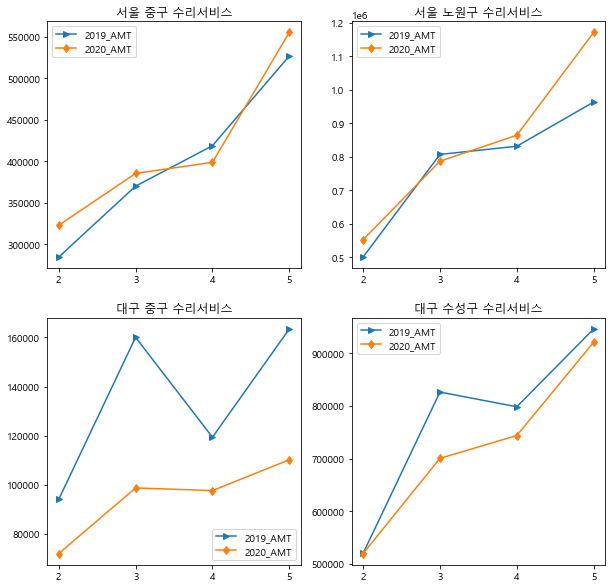

In [141]:
# 구별 산업별 월별 기준 AMT변화 비교
data = [(sh_seoul_gunggu_19,sh_seoul_gunggu_20),(sh_seoul_nowongu_19,sh_seoul_nowongu_20),(sh_daegu_gunggu_19,sh_daegu_gunggu_20),(sh_daegu_suseonggu_19,sh_daegu_suseonggu_20)]
industry = list(sh_data['INDUSTRY_CODE_DICT'].values())

label = [2,3,4,5]
index = np.arange(len(label))

for i in range(23):
    plt.figure(figsize = (10,10))
    plt.subplot(2,2,1)
    plt.plot(index, sh_seoul_gunggu_19['USE_AMT'][i::23],'>-',label= '2019_AMT')
    plt.plot(index, sh_seoul_gunggu_20['USE_AMT'][i::23],'d-',label= '2020_AMT')
    plt.xticks(index, label)
    plt.legend()
    plt.title('서울 중구 '+industry[i])
    
    plt.subplot(2,2,2)
    plt.plot(index, sh_seoul_nowongu_19['USE_AMT'][i::23],'>-',label= '2019_AMT')
    plt.plot(index, sh_seoul_nowongu_20['USE_AMT'][i::23],'d-',label= '2020_AMT')
    plt.xticks(index, label)
    plt.legend()
    plt.title('서울 노원구 '+industry[i])
    
    plt.subplot(2,2,3)
    plt.plot(index, sh_daegu_gunggu_19['USE_AMT'][i::23],'>-',label= '2019_AMT')
    plt.plot(index, sh_daegu_gunggu_20['USE_AMT'][i::23],'d-',label= '2020_AMT')
    plt.xticks(index, label)
    plt.legend()ㅠ
    plt.title('대구 중구 '+industry[i])

    plt.subplot(2,2,4)
    plt.plot(index, sh_daegu_suseonggu_19['USE_AMT'][i::23],'>-',label= '2019_AMT')
    plt.plot(index, sh_daegu_suseonggu_20['USE_AMT'][i::23],'d-',label= '2020_AMT')
    plt.xticks(index, label)
    plt.legend()
    plt.title('대구 수성구 '+industry[i])
    
    plt.show()
    
# 대구 중구만 2020년 3월에 숙박 매출이 증가 -> 이외에는 전체적으로 3월에 감소 후 점진적 증가 양상을 보임
# 레저 용품의 경우 모두 5월에 급증가
# 노원구 문화취미가 5월에 급증가 (2019년 매출을 넘어버림) -> 연령대 확인 필요
# 서울 중구 4월에 광학제품 급증 -> 확인 필요
# 대구 수성구는 2020년 4월 유통업이 유일하게 감소
# 사무통신, 자동차판매, 자동차정비의 경우 구별로 매출액 추이가 모두 상이


#### 할 것
1. GS 대구 수성구 유통업 변화 확인 필요
2. 서울 중구 광학제품 유통업 변화 확인 필요

In [50]:
suseonggu = gs.query("(GU_NM =='수성구')")

,DATE,YEAR,MONTH,DAY,SI_NM,GU_NM,DONG_NM,AMT_IND,식사,간식,...,홈&리빙,헬스&뷰티,취미&여가활동,사회활동,임신/육아,SI_CODE,GU_CODE,DONG_CODE,TOTAL_CODE,SUM
0,2019-02-01,2019,2,1,대구,수성구,고산1동,1.06,0.51,0.19,...,0.02,0.05,0.01,0.01,0.00,27,26,670,2726670,1.06
1,2019-02-01,2019,2,1,대구,수성구,고산2동,1.08,0.53,0.23,...,0.01,0.04,0.00,0.01,0.00,27,26,680,2726680,1.08
2,2019-02-01,2019,2,1,대구,수성구,고산3동,0.86,0.27,0.15,...,0.01,0.03,0.01,0.01,0.01,27,26,690,2726690,0.86
3,2019-02-01,2019,2,1,대구,수성구,두산동,0.72,0.14,0.09,...,0.01,0.07,0.00,0.01,0.00,27,26,640,2726640,0.72
4,2019-02-01,2019,2,1,대구,수성구,만촌1동,1.16,0.55,0.27,...,0.06,0.05,0.01,0.01,0.00,27,26,550,2726550,1.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14415,2020-05-31,2020,5,31,대구,수성구,중동,0.88,0.18,0.18,...,0.03,0.05,0.00,0.01,0.01,27,26,610,2726610,0.88
14416,2020-05-31,2020,5,31,대구,수성구,지산1동,0.69,0.14,0.10,...,0.00,0.02,0.00,0.00,0.00,27,26,651,2726651,0.69
14417,2020-05-31,2020,5,31,대구,수성구,지산2동,0.70,0.14,0.13,...,0.01,0.03,0.00,0.00,0.00,27,26,652,2726652,0.70
14418,2020-05-31,2020,5,31,대구,수성구,황금1동,1.02,0.27,0.31,...,0.01,0.04,0.00,0.02,0.01,27,26,601,2726601,1.02


In [16]:
suseonggu = pd.DataFrame(suseonggu.groupby(['YEAR','MONTH'])['AMT_IND'].sum())

AMT_IND
YEAR MONTH         
2019 2       524.48
     3       561.02
     4       564.57
     5       598.34
2020 2       499.20
     3       446.17
     4       454.50
     5       531.12

##### * GS 유통은 SH 유통업의 일부라서 변화가 보이지 않음 (편의점 이외의 부분에서  매출이 감소한 건가..?)

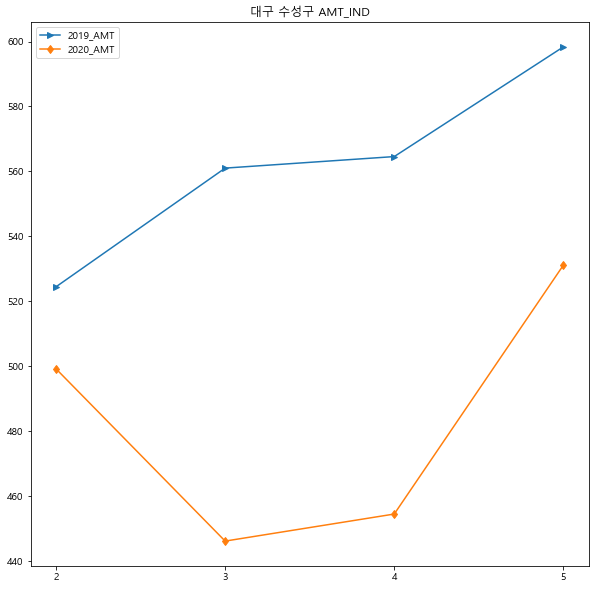

In [17]:
# 대구 수성구 AMT_IND 변화
label = [2,3,4,5]
index = np.arange(len(label))

plt.figure(figsize = (10,10))

plt.plot(index,suseonggu[:4],'>-',label= '2019_AMT')
plt.plot(index, suseonggu[4:],'d-',label= '2020_AMT')
plt.xticks(index, label)
plt.legend()
plt.title('대구 수성구 AMT_IND')
plt.show()